In [3]:

import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from News_Articles import articles
import matplotlib.pyplot as plt


In [4]:
stop_words = stopwords.words("english")
normalizer = WordNetLemmatizer()

def get_parts_of_speech(word):
    probable_parts_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len([item for item in probable_parts_of_speech if item.pos() == 'n'])
    pos_counts["v"] = len([item for item in probable_parts_of_speech if item.pos() == 'v'])
    pos_counts["a"] = len([item for item in probable_parts_of_speech if item.pos() == 'a'])
    pos_counts['r'] = len([item for item in probable_parts_of_speech if item.pos() == 'r'])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech
def pre_processed_text(text):
    cleaned = re.sub(r'\W+',' ',text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token,get_parts_of_speech(token)) for token in tokenized if not re.match(r'\d+',token)])
    return normalized

In [5]:
preprocessed_articles = [pre_processed_text(article) for article in articles]

In [6]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(preprocessed_articles)

In [7]:
transformer = TfidfVectorizer(norm=None)
tfidf_scores = transformer.fit_transform(preprocessed_articles)

In [8]:
feature_names = vectorizer.get_feature_names_out()
article_index = [f'Article {i + 1}' for i in range(len(articles))]

In [9]:
df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=article_index)
print(df_tf_idf)

              Article 1  Article 2  Article 3  Article 4  Article 5  \
__cf_email__        0.0        0.0        0.0        0.0        0.0   
a300                0.0        0.0        0.0        0.0        0.0   
a320                0.0        0.0        0.0        0.0        0.0   
a321                0.0        0.0        0.0        0.0        0.0   
a330                0.0        0.0        0.0        0.0        0.0   
...                 ...        ...        ...        ...        ...   
zverev              0.0        0.0        0.0        0.0        0.0   
zvereva             0.0        0.0        0.0        0.0        0.0   
zyl                 0.0        0.0        0.0        0.0        0.0   
étienne             0.0        0.0        0.0        0.0        0.0   
über                0.0        0.0        0.0        0.0        0.0   

              Article 6  Article 7  Article 8  Article 9  Article 10  ...  \
__cf_email__        0.0        0.0        0.0        0.0         0.0  

In [19]:
words = []
length = 100
for i in range(1,101):
    words.append(df_tf_idf[f'Article {i}'].idxmax())
    print(df_tf_idf[[f'Article {i}']].idxmax())
words

Article 1    fare
dtype: object
Article 2    percent
dtype: object
Article 3    hong
dtype: object
Article 4    the
dtype: object
Article 5    oil
dtype: object
Article 6    arabia
dtype: object
Article 7    kse
dtype: object
Article 8    ang
dtype: object
Article 9    sugar
dtype: object
Article 10    oil
dtype: object
Article 11    yen
dtype: object
Article 12    hong
dtype: object
Article 13    the
dtype: object
Article 14    petrol
dtype: object
Article 15    price
dtype: object
Article 16    petrol
dtype: object
Article 17    notification
dtype: object
Article 18    percent
dtype: object
Article 19    ecc
dtype: object
Article 20    king
dtype: object
Article 21    rent
dtype: object
Article 22    brunei
dtype: object
Article 23    the
dtype: object
Article 24    litre
dtype: object
Article 25    syriza
dtype: object
Article 26    the
dtype: object
Article 27    islamic
dtype: object
Article 28    barrel
dtype: object
Article 29    decrease
dtype: object
Article 30    mortgage
dty

['fare',
 'percent',
 'hong',
 'the',
 'oil',
 'arabia',
 'kse',
 'ang',
 'sugar',
 'oil',
 'yen',
 'hong',
 'the',
 'petrol',
 'price',
 'petrol',
 'notification',
 'percent',
 'ecc',
 'king',
 'rent',
 'brunei',
 'the',
 'litre',
 'syriza',
 'the',
 'islamic',
 'barrel',
 'decrease',
 'mortgage',
 'oil',
 'load',
 'greek',
 'imf',
 'engine',
 'fairly',
 'the',
 'greek',
 'petrol',
 'robust',
 'hsbc',
 'iea',
 'truck',
 'tapi',
 'hotel',
 'sim',
 'tax',
 'duty',
 'the',
 'oil',
 'furnace',
 'notification',
 'qatargas',
 'yen',
 'operation',
 'crude',
 'car',
 'refinery',
 'lng',
 'oil',
 'sugar',
 'crude',
 'yen',
 'rs5',
 'crude',
 'tajikistan',
 'crude',
 'hong',
 'billion',
 'the',
 'the',
 'bahria',
 'imf',
 'tax',
 'the',
 'cng',
 'crude',
 'imf',
 'oil',
 'ecc',
 'iea',
 'the',
 'crude',
 'railway',
 'point',
 'stockpile',
 'the',
 'interest',
 'crude',
 'moody',
 'in',
 'gas',
 'percent',
 'yemen',
 'stock',
 'price',
 'litre',
 'the',
 'litre',
 'gas']

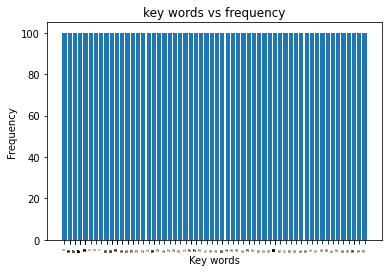

In [34]:
plt.bar(words,length)
plt.title("key words vs frequency")
plt.ylabel("Frequency")
plt.xlabel("Key words")
plt.xticks(words, [str(i) for i in range(length)], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='x', which='major', labelsize=3)
plt.show()